<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Ned_Horsey_LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 16:22:20--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 16:22:20 (150 MB/s) - ‘misleading.py’ saved [1258/1258]



### Fix misleading plot #1

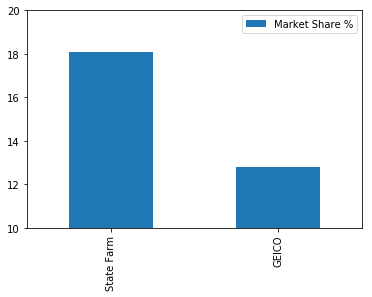

In [5]:
misleading.plot1();

In [0]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})

def plot1():
    return insurance.plot.bar()

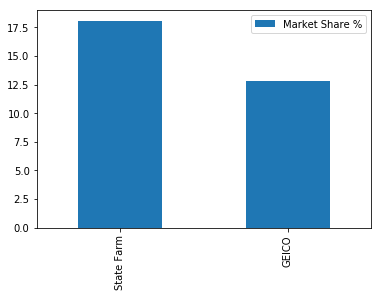

In [14]:
insurance.plot.bar();

### Fix misleading plot #2

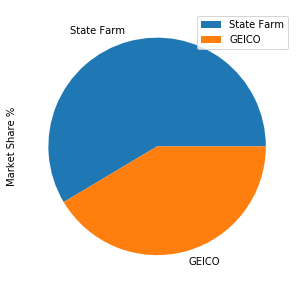

In [12]:
misleading.plot2();

In [15]:
other = pd.DataFrame(
    index=['Other'], 
    data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


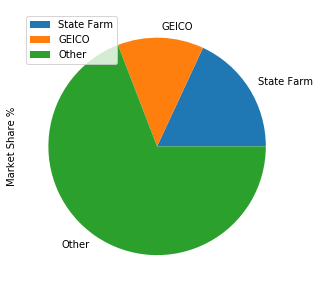

In [16]:
insurance.plot.pie('Market Share %', figsize=(5,5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [18]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [28]:
df.rename(columns={'STATE FARM GRP' : 'State Farm policy premiums'}, inplace=True)

df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [29]:
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [32]:
df['State Farm Market share %'] = (df['State Farm policy premiums'] / df['STATE TOTAL']) * 100
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm Market share %
0,Alabama,1,768213,282947,3025561,25.390762
1,Alaska,2,128613,81366,454623,28.290034
2,Arizona,4,760003,604049,4373055,17.379223
3,Arkansas,5,454931,96908,1777917,25.587865
4,California,6,3655463,2091720,25255501,14.473928


In [35]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
# source = data.population_engineers_hurricanes.url
variable = 'State Farm Market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm Market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [37]:
df.shape

(44, 3)

### See the data

In [39]:
df.sample(10)

,dataset,x,y
30,III,12.0,8.15
4,I,11.0,8.33
43,IV,8.0,6.89
1,I,8.0,6.95
25,III,9.0,7.11
9,I,7.0,4.82
34,IV,8.0,5.76
12,II,8.0,8.14
24,III,13.0,12.74
31,III,7.0,6.42


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [44]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [45]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [46]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [48]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [49]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

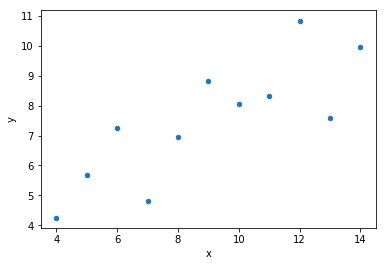

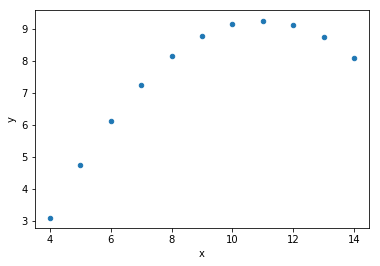

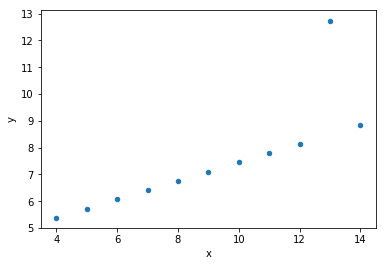

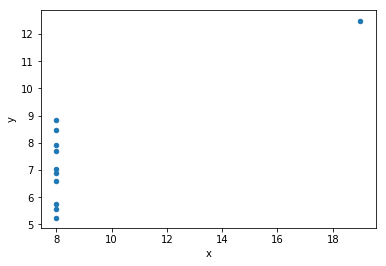

In [53]:
groups.plot('x','y', kind = 'scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

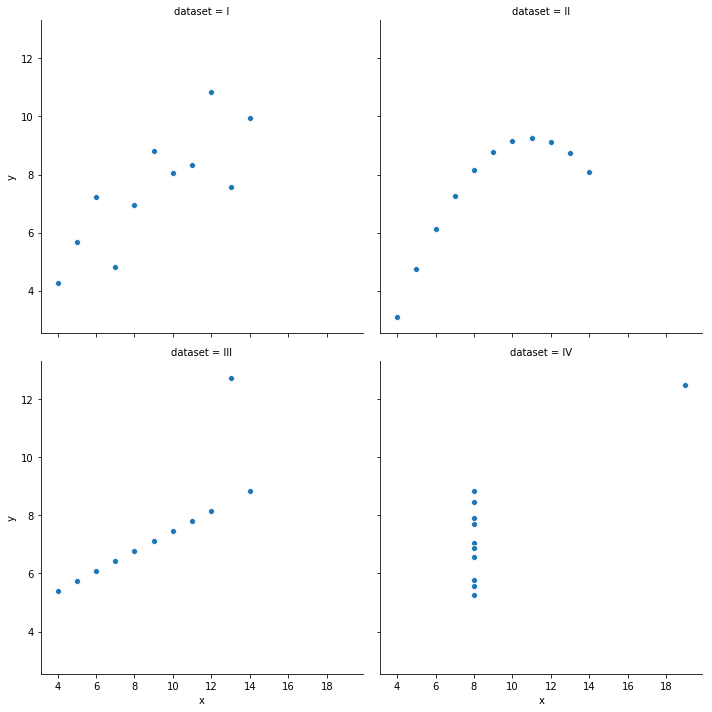

In [68]:
sns.relplot('x','y', col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

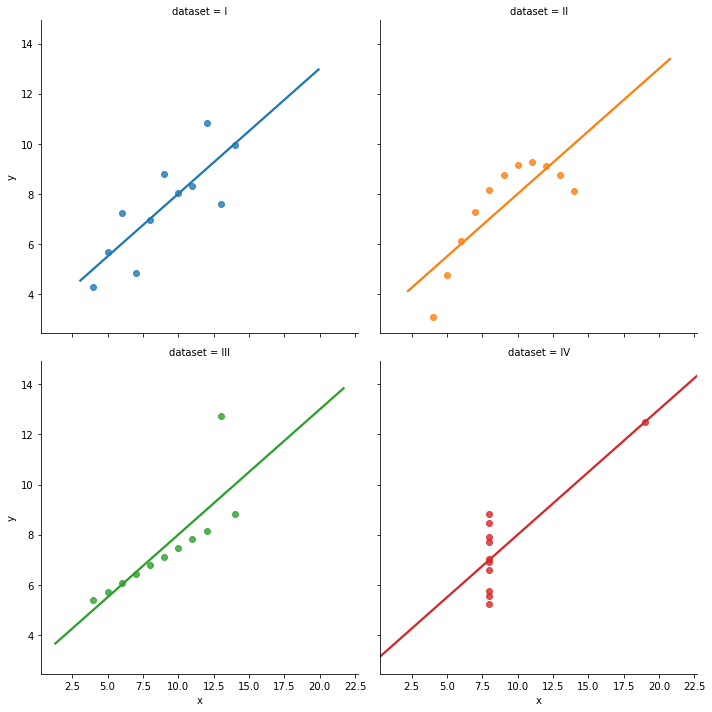

In [70]:
sns.lmplot('x', 'y', col='dataset', data=df, col_wrap=2, hue='dataset', ci=None)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [60]:
tips.shape

(244, 7)

### See the first 5 rows

In [0]:
tips.head()

tips['smoker'].replace({'No':0, 'Yes':1}, inplace=True)

### Describe the data

In [67]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

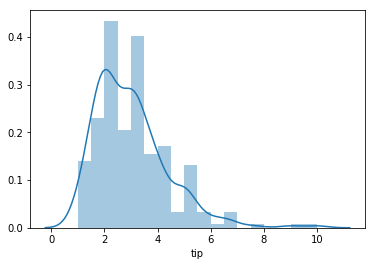

In [71]:
sns.distplot(tips.tip)

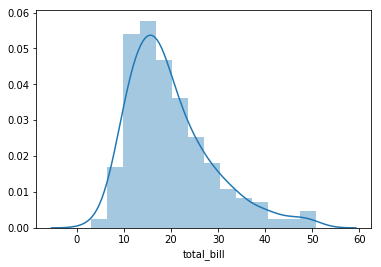

In [72]:
sns.distplot(tips.total_bill)

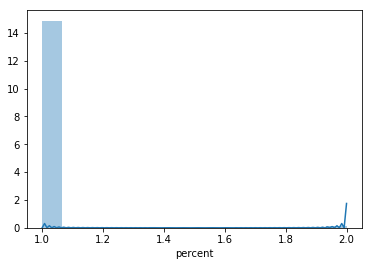

In [74]:
tips['percent'] =tips['tip'] / tips['total_bill']

sns.distplot(tips['percent'].value_counts())

In [78]:
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

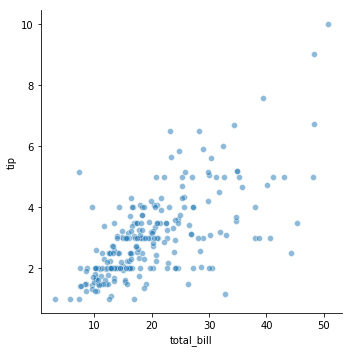

In [79]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

# sns.relplot('x','y', col='dataset', data=df, col_wrap=2)

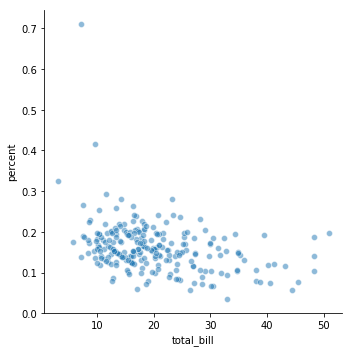

In [80]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5)


### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

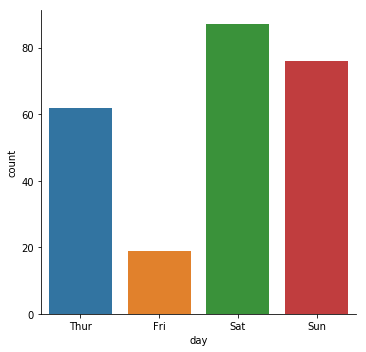

In [83]:
sns.catplot('day', data=tips, kind='count')

In [81]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

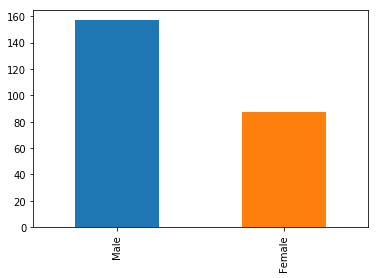

In [82]:
tips['sex'].value_counts().plot.bar()

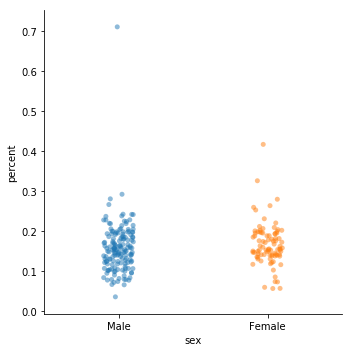

In [85]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5)

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [87]:
flights.shape

(144, 3)

### See the first 5 rows

In [88]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [89]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

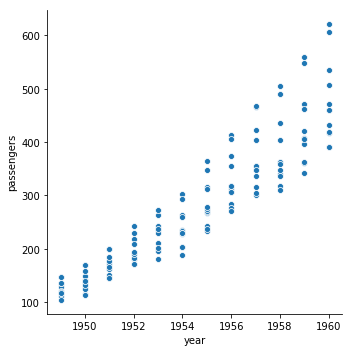

In [90]:
sns.relplot('year', 'passengers', data=flights)

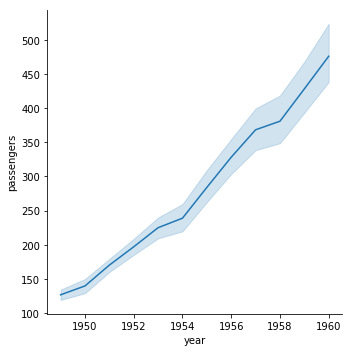

In [92]:
sns.relplot('year', 'passengers', data=flights, kind='line', ci=95)

### Plot month & passengers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

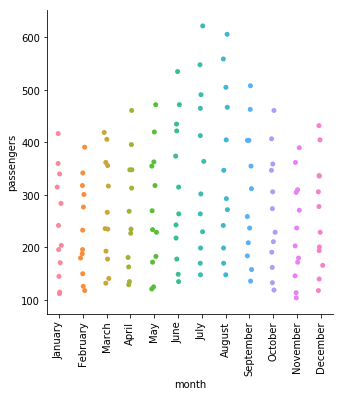

In [100]:
sns.catplot('month', 'passengers', data=flights)
plt.xticks(rotation=90)

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [103]:
flights.pivot_table(index='month', columns='year', values='passengers')[:5]

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [95]:
table = flights.pivot_table('passengers', 'month', 'year')

table.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

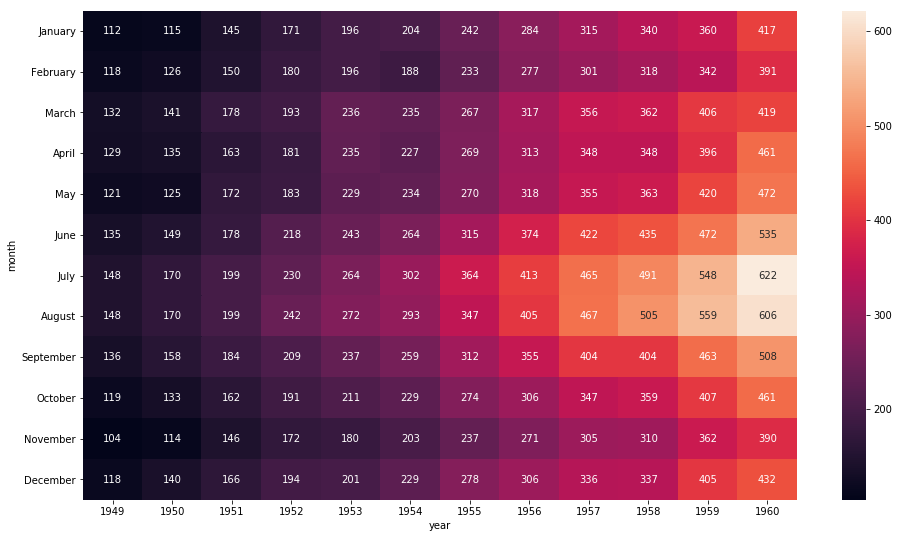

In [96]:
plt.figure(figsize=(16,9))
sns.heatmap(table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [106]:
# Source and inspiration for the following example:https://altair-viz.github.io/gallery/layered_histogram.html

# I'm using a dataset from iea.org on electricity consumption in GwH

from google.colab import files
upload = files.upload()

Saving power_data.xlsx to power_data.xlsx


In [0]:
xls = pd.ExcelFile('power_data.xlsx')
df = pd.read_excel(xls, 'Sheet1')

In [111]:
df.shape

(72, 228)

In [118]:
df1 = df.reset_index().rename(columns={'level_0': 'country', 'level_1': 'elec_consumption'})
df1.sample(5)
# Checking the columns and relabeling a little

,country,elec_consumption,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
60,UNITED KINGDOM,=Indigenous Production,32679,31557,35386,28510,27058,28916,25388,24289,...,30385.037,26154.641,24327.645,22996.213,23765.974,23702.335,23990.332,26829.961,28285.923,28392.097
63,UNITED KINGDOM,= Electricity Supplied,33466,32603,36791,29534,28347,30382,26494,25511,...,31889.845,27772.320,26035.573,24629.997,25660.963,25316.309,25188.824,27660.944,29375.256,29943.583
19,BELGIUM,+ Geothermal/Other,1,1,1,1,1,1,1,1,...,1073.096,990.905,965.869,898.266,931.589,902.705,823.398,920.286,982.105,1129.047
17,BELGIUM,+ Nuclear,4101,3069,3917,3561,3662,3547,3336,3755,...,3640.093,2713.188,2438.077,2077.419,2175.661,1878.140,1376.825,991.276,1127.076,1628.774
37,SWEDEN,+ Imports,1130,938,1576,1228,1869,1974,1557,1835,...,1384.791,867.690,509.421,865.458,1240.044,1342.427,1129.024,1205.569,1284.362,886.143


In [121]:
df1['elec_consumption'].unique()

array(['+ Combustible Fuels', '+ Nuclear', '+ Hydro',
       '+ Geothermal/Other', '=Indigenous Production', '+ Imports',
       '- Exports', '= Electricity Supplied'], dtype=object)

In [0]:
df_elec = df1[(df1['elec_consumption'] == '= Electricity Supplied')]

In [143]:
df_elec.drop(labels='elec_consumption', axis=1, inplace=True)
df_elec.head()
# this is what we reallywant, total electricity consumption in GwH

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country,2000-01-01 00:00:00,2000-02-01 00:00:00,2000-03-01 00:00:00,2000-04-01 00:00:00,2000-05-01 00:00:00,2000-06-01 00:00:00,2000-07-01 00:00:00,2000-08-01 00:00:00,2000-09-01 00:00:00,...,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00,2018-06-01 00:00:00,2018-07-01 00:00:00,2018-08-01 00:00:00,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00
7,AUSTRALIA,15947,15941,15920,16370,16362,16376,17060,17050,17039,...,20623.168,19049.186,20025.355,21106.515,21277.615,21135.555,19129.448,19157.929,19105.374,20449.693
15,AUSTRIA,5496,5011,5196,4606,4516,4353,4536,4483,4651,...,6898.876,5717.977,5662.147,5578.271,5605.814,5776.974,5755.544,6226.108,6397.011,6846.912
23,BELGIUM,7696,7242,7563,6812,6830,6462,6307,6429,6717,...,8237.257,7117.822,7120.987,6906.738,7050.026,6937.855,6788.497,7436.242,7655.145,7906.133
31,CANADA,54479,49009,47972,43255,42674,41318,41733,42775,41125,...,53883.451,48024.485,44613.695,43447.221,47329.112,47395.937,44140.237,48168.848,52941.991,57520.888
39,SWEDEN,14907,13906,14215,11895,10892,9783,9361,10456,11080,...,14859.112,11207.536,9775.073,8910.630,8472.861,9182.441,9560.354,11173.143,12460.198,14052.092


In [192]:
tidy = df_elec.melt(id_vars='country').rename(columns = {'variable': 'Time', 'value': 'Electricity Consumper per Month (GWh)'})
tidy.head()

,country,Time,Electricity Consumper per Month (GWh)
0,AUSTRALIA,2000-01-01,15947.0
1,AUSTRIA,2000-01-01,5496.0
2,BELGIUM,2000-01-01,7696.0
3,CANADA,2000-01-01,54479.0
4,SWEDEN,2000-01-01,14907.0


In [193]:
tidy.dtypes

country                                          object
Time                                     datetime64[ns]
Electricity Consumper per Month (GWh)           float64
dtype: object

In [194]:
import altair as alt

alt.Chart(tidy).mark_line().encode(
              x='Time',
              y='Electricity Consumper per Month (GWh)',
              color='country'
)

Chart({
  data:              country       Time  Electricity Consumper per Month (GWh)
  0          AUSTRALIA 2000-01-01                              15947.000
  1            AUSTRIA 2000-01-01                               5496.000
  2            BELGIUM 2000-01-01                               7696.000
  3             CANADA 2000-01-01                              54479.000
  4             SWEDEN 2000-01-01                              14907.000
  5        SWITZERLAND 2000-01-01                               5560.000
  6             TURKEY 2000-01-01                              10836.000
  7     UNITED KINGDOM 2000-01-01                              33466.000
  8      UNITED STATES 2000-01-01                             327718.000
  9          AUSTRALIA 2000-02-01                              15941.000
  10           AUSTRIA 2000-02-01                               5011.000
  11           BELGIUM 2000-02-01                               7242.000
  12            CANADA 2000-02-01                              49009.000
  13            SWEDEN 2000-02-01                              13906.000
  14       SWITZERLAND 2000-02-01                               5074.000
  15            TURKEY 2000-02-01                              10572.000
  16    UNITED KINGDOM 2000-02-01                              32603.000
  17     UNITED STATES 2000-02-01                             294305.000
  18         AUSTRALIA 2000-03-01                              15920.000
  19           AUSTRIA 2000-03-01                               5196.000
  20           BELGIUM 2000-03-01                               7563.000
  21            CANADA 2000-03-01                              47972.000
  22            SWEDEN 2000-03-01                              14215.000
  23       SWITZERLAND 2000-03-01                               5141.000
  24            TURKEY 2000-03-01                              10556.000
  25    UNITED KINGDOM 2000-03-01                              36791.000
  26     UNITED STATES 2000-03-01                             297826.000
  27         AUSTRALIA 2000-04-01                              16370.000
  28           AUSTRIA 2000-04-01                               4606.000
  29           BELGIUM 2000-04-01                               6812.000
  ...              ...        ...                                    ...
  2022          TURKEY 2018-09-01                              24272.404
  2023  UNITED KINGDOM 2018-09-01                              25188.824
  2024   UNITED STATES 2018-09-01                             364865.471
  2025       AUSTRALIA 2018-10-01                              19157.929
  2026         AUSTRIA 2018-10-01                               6226.108
  2027         BELGIUM 2018-10-01                               7436.242
  2028          CANADA 2018-10-01                              48168.848
  2029          SWEDEN 2018-10-01                              11173.143
  2030     SWITZERLAND 2018-10-01                               5037.350
  2031          TURKEY 2018-10-01                              22638.700
  2032  UNITED KINGDOM 2018-10-01                              27660.944
  2033   UNITED STATES 2018-10-01                             331479.502
  2034       AUSTRALIA 2018-11-01                              19105.374
  2035         AUSTRIA 2018-11-01                               6397.011
  2036         BELGIUM 2018-11-01                               7655.145
  2037          CANADA 2018-11-01                              52941.991
  2038          SWEDEN 2018-11-01                              12460.198
  2039     SWITZERLAND 2018-11-01                               5812.055
  2040          TURKEY 2018-11-01                              23012.606
  2041  UNITED KINGDOM 2018-11-01                              29375.256
  2042   UNITED STATES 2018-11-01                             327820.780
  2043       AUSTRALIA 2018-12-01                              20449.693
  2044         AUSTRIA 2018-12-01           